In [1]:
import numpy as np
import random
import os
os.environ['ON_PY']="1"


In [2]:
from params import configs
from data_utils import SD2_instance_generator
num_jobs = 17
num_machines = 11
num_operations = 11

job_length, op_pt, op_per_mch = SD2_instance_generator(configs, num_jobs, num_machines, num_operations)
job_length



array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11])

In [3]:

# 定义问题的输入
processing_times = np.array(op_pt)

# 初始化种群
def initialize_population(pop_size, num_jobs, num_machines):
    population = []
    for _ in range(pop_size):
        individual = []
        for job in range(num_jobs):
            for op in range(num_operations):
                machines = [m for m in range(num_machines) if processing_times[job * num_operations + op, m] > 0]
                machine_choice = random.choice(machines)
                individual.append((job, op, machine_choice))
        random.shuffle(individual)
        population.append(individual)
    return population

# 计算适应度
def calculate_fitness(individual):
    machine_time = np.zeros(num_machines)
    job_time = np.zeros(num_jobs)
    
    for job, op, machine in individual:
        start_time = max(machine_time[machine], job_time[job])
        processing_time = processing_times[job * num_operations + op, machine]
        machine_time[machine] = start_time + processing_time
        job_time[job] = start_time + processing_time
    
    return max(machine_time)

# 选择
def selection(population, fitness):
    sorted_population = [x for _, x in sorted(zip(fitness, population))]
    return sorted_population[:len(population)//2]

# 交叉
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 2)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# 变异
def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(individual)), 2)
        individual[i], individual[j] = individual[j], individual[i]

# 遗传算法
# 遗传算法
def genetic_algorithm(pop_size, mutation_rate, generations):
    population = initialize_population(pop_size, num_jobs, num_machines)
    best_fitness_over_time = []
    
    for _ in range(generations):
        fitness = [calculate_fitness(ind) for ind in population]
        best_fitness_over_time.append(min(fitness))
        population = selection(population, fitness)
        
        next_generation = []
        while len(next_generation) < pop_size:
            parent1, parent2 = random.sample(population, 2)
            child1, child2 = crossover(parent1, parent2)
            mutate(child1, mutation_rate)
            mutate(child2, mutation_rate)
            next_generation.extend([child1, child2])
        
        population = next_generation
    
    fitness = [calculate_fitness(ind) for ind in population]
    best_individual = population[np.argmin(fitness)]
    best_fitness_over_time.append(min(fitness))
    
    return best_individual, min(fitness), best_fitness_over_time


Time:2.364029884338379
Best solution: [(2, 4, 9), (0, 5, 3), (2, 9, 0), (13, 1, 10), (15, 4, 5), (1, 9, 1), (1, 10, 10), (1, 3, 3), (1, 10, 10), (9, 8, 0), (3, 10, 1), (1, 9, 1), (0, 1, 9), (2, 4, 9), (1, 5, 0), (6, 6, 2), (3, 3, 2), (5, 10, 6), (0, 7, 4), (11, 5, 7), (0, 0, 4), (8, 4, 4), (10, 2, 10), (4, 4, 5), (12, 10, 1), (8, 8, 6), (4, 9, 3), (13, 6, 4), (15, 7, 3), (2, 5, 8), (12, 9, 1), (6, 8, 9), (0, 2, 10), (6, 6, 2), (4, 4, 5), (4, 3, 4), (15, 10, 7), (4, 3, 4), (2, 4, 9), (0, 1, 9), (6, 6, 10), (2, 7, 3), (3, 5, 7), (14, 2, 5), (11, 3, 6), (0, 7, 4), (1, 9, 5), (3, 5, 7), (0, 9, 5), (4, 2, 1), (13, 1, 10), (8, 7, 4), (6, 3, 1), (1, 7, 9), (7, 7, 3), (13, 0, 7), (6, 6, 2), (11, 4, 0), (4, 10, 0), (13, 8, 1), (13, 6, 4), (6, 6, 10), (9, 0, 8), (11, 3, 6), (0, 10, 2), (2, 1, 0), (4, 10, 9), (6, 2, 5), (2, 9, 0), (0, 1, 9), (13, 7, 9), (4, 10, 0), (10, 2, 10), (2, 6, 9), (1, 10, 10), (1, 9, 5), (5, 10, 6), (13, 2, 7), (15, 3, 7), (13, 2, 4), (0, 1, 9), (0, 1, 9), (2, 8, 0), (5, 

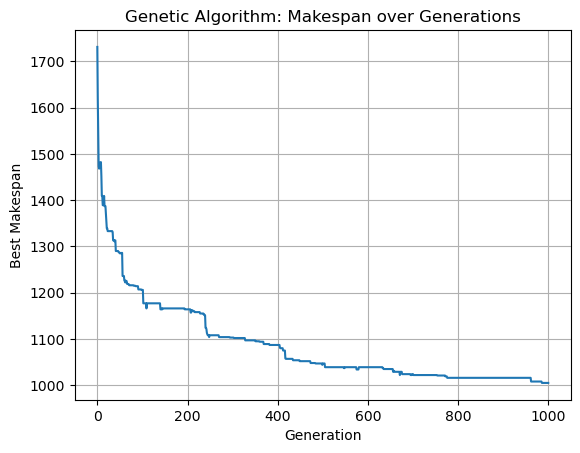

In [4]:

# 设置参数并运行遗传算法
population_size = 20
mutation_rate = 0.1
generations = 1000

import time
import matplotlib.pyplot as plt

t1 = time.time()
best_solution, best_fitness, fitness_over_time = genetic_algorithm(population_size, mutation_rate, generations)
t2 = time.time()
print(f"Time:{t2 - t1}")
print(f"Best solution: {best_solution}")
print(f"Best fitness (makespan): {best_fitness}")


# 可视化迭代过程中的makespan
plt.plot(fitness_over_time)
plt.title('Genetic Algorithm: Makespan over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Makespan')
plt.grid(True)
plt.show()


